In [9]:
import pandas as pd

In [10]:
import numpy as np      
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#db = pd.read_csv('encoded.csv')
db = pd.read_csv('noise_removed')

In [12]:
db = db.dropna()

In [13]:
db.columns

Index(['Unnamed: 0', 'Total Funding Amount (in USD)', 'Industry', 'Days',
       'Tech_or_nonTech', 'Exit', 'is_NY', 'is_CA', 'is_TX', 'is_PA', 'is_MA',
       'is_OH', 'is_IL', 'Lat', 'Long', 'Technology', 'Healthcare', 'Finance',
       'Retail', 'Travel', 'Education', 'Automotive', 'Food', 'Sports',
       'Aerospace', 'Oil and Energy', 'Services', 'Biotechnology',
       'Hospitality and Entertainment', 'Manufacturing and Real Estate',
       'Transportation', 'Marketing', 'Location'],
      dtype='object')

In [14]:
unique_exit_values = db['Exit'].unique()
print(unique_exit_values)

[5 1 2 4 0 3]


In [15]:
import random

total_data_points = db.shape[0]
random_sample_size = 500

random_indices = random.sample(range(total_data_points), random_sample_size)

test_data = db.iloc[random_indices]
db.reset_index(drop=True, inplace=True)

db = db.drop(index=random_indices)

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
X = db.drop('Exit', axis=1)  
y = db['Exit']
x_test = test_data
sc = MinMaxScaler()
X =  sc.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)
print("Shape of the test data :", x_test.shape)

Shape of the X Train : (3760, 32)
Shape of the y Train : (3760,)
Shape of the X test : (941, 32)
Shape of the y test : (941,)
Shape of the test data : (500, 33)


Training Accuracy : 0.7393617021276596
Testing Accuracy : 0.7311370882040382


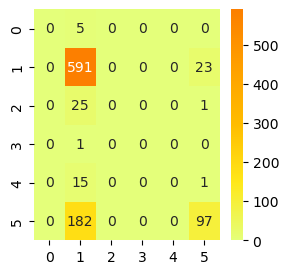

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.72      0.96      0.82       614
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.80      0.35      0.48       279

    accuracy                           0.73       941
   macro avg       0.25      0.22      0.22       941
weighted avg       0.71      0.73      0.68       941

Micro-average F1-score: 0.7311370882040382
Macro-average F1-score: 0.2181055850719793


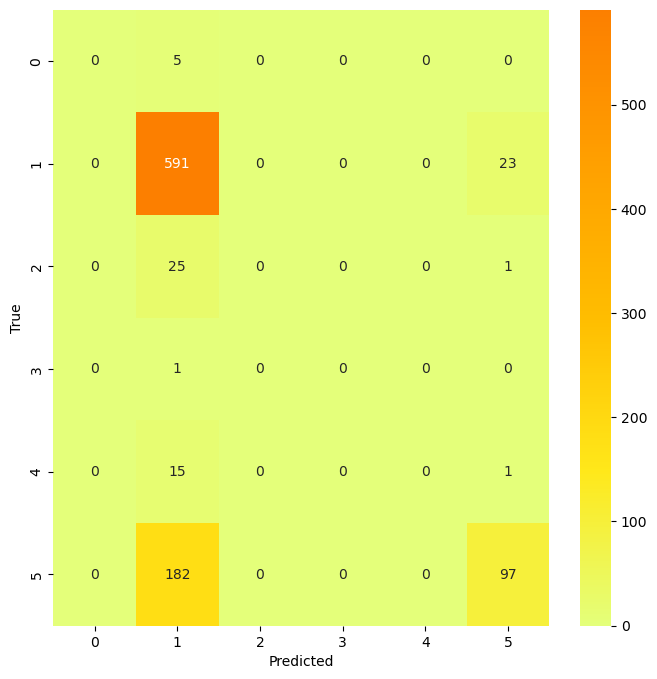

In [19]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
warnings.filterwarnings("ignore")
rf = RandomForestClassifier(bootstrap=False, max_depth=12, min_samples_leaf=100, min_samples_split=20,
                       n_estimators=100,criterion='entropy',n_jobs=1000,max_leaf_nodes=100,max_features='auto'
                           )

    
rf.fit(X,y)


y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)

from sklearn.metrics import f1_score

# Calculate micro and macro-average F1-scores
micro_f1 = f1_score(y_test, y_pred_rf, average='micro')
macro_f1 = f1_score(y_test, y_pred_rf, average='macro')

print("Micro-average F1-score:", micro_f1)
print("Macro-average F1-score:", macro_f1)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot=True, cmap='Wistia', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

warnings.resetwarnings()

In [20]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [21]:
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

In [22]:
lasso = Lasso(alpha =0.0005, random_state=0)
elasticNet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=0)
kernelRidge = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
svr = SVR(C= 20, epsilon= 0.008, gamma=0.0003)
gradientBoosting = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =0)
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =0, nthread = -1)
randomForest = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=0)

In [23]:
scores ={}
score = rmsle_cv(lasso)
print("Lasso:: Mean:",score.mean(), " Std:", score.std())
scores['lasso'] = (score.mean(), score.std())
lasso_model = lasso.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_train)
rmsle(y_train,y_pred_lasso)

Lasso:: Mean: 1.6605975554514036  Std: 0.04030862421166533


1.6430518996194268

In [24]:
score = rmsle_cv(elasticNet)
print("ElasticNet:: Mean:",score.mean(), " Std:", score.std())
scores['elasticNet'] = (score.mean(), score.std())
elasticNet_model = elasticNet.fit(X_train, y_train)
y_pred_elasticNet = elasticNet_model.predict(X_train)
rmsle(y_train,y_pred_elasticNet)

ElasticNet:: Mean: 1.659263485378356  Std: 0.040246619865684154


1.6432292548784748

In [25]:
warnings.filterwarnings("ignore")
score = rmsle_cv(kernelRidge)
print("KernelRidge:: Mean:",score.mean(), " Std:", score.std())
scores['kernelRidge'] = (score.mean(), score.std())
kernelRidge_model = kernelRidge.fit(X_train, y_train)
y_pred_kernelRidge = kernelRidge_model.predict(X_train)
rmsle(y_train,y_pred_kernelRidge)
warnings.resetwarnings()

KernelRidge:: Mean: 1.6491805810963864  Std: 0.04333424120078698


In [26]:
score = rmsle_cv(svr)
print("SVR:: Mean:",score.mean(), " Std:", score.std())
scores['svr'] = (score.mean(), score.std())
svr_model = svr.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_train)
rmsle(y_train,y_pred_svr)

SVR:: Mean: 2.092254473342611  Std: 0.08984788883592618


2.0941223715173884

In [27]:
score = rmsle_cv(gradientBoosting)
print("GradientBoostingRegressor:: Mean:",score.mean(), " Std:", score.std())
scores['gradientBoosting'] = (score.mean(), score.std())
gradientBoosting_model = gradientBoosting.fit(X_train, y_train)
y_pred_gradientBoosting = gradientBoosting_model.predict(X_train)
rmsle(y_train,y_pred_gradientBoosting)

GradientBoostingRegressor:: Mean: 1.4498148893174672  Std: 0.05706615943775095


0.845414938680952

In [28]:

score = rmsle_cv(xgb)
print("XGBRegressor:: Mean:",score.mean(), " Std:", score.std())
scores['xgb'] = (score.mean(), score.std())
xgb_model = xgb.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_train)
rmsle(y_train,y_pred_xgb)

[10:21:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:21:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:21:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:21:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:21:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:21:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-

0.8724365533336713

In [29]:
score = rmsle_cv(randomForest)
print("RandomForestRegressor:: Mean:",score.mean(), " Std:", score.std())
scores['randomForest'] = (score.mean(), score.std())
randomForest_model = randomForest.fit(X_train, y_train)
y_pred_randomForest = randomForest_model.predict(X_train)
rmsle(y_train,y_pred_randomForest)

RandomForestRegressor:: Mean: 1.4646116512333267  Std: 0.04679756872073121


1.071238094502388

In [30]:
def ensemble_models(X):
    return ((0.1 * lasso_model.predict(X)) +
            (0.1 * elasticNet_model.predict(X)) +
           (0.1 * kernelRidge_model.predict(X)) +
           (0.4 * gradientBoosting_model.predict(X)) + 
           (0.1 * xgb_model.predict(X)))

In [31]:
averaged_score = rmsle(y_train, ensemble_models(X_train))
scores['averaged'] = (averaged_score, 0)
print('RMSLE score on train data:', averaged_score)

RMSLE score on train data: 1.2521235856507487


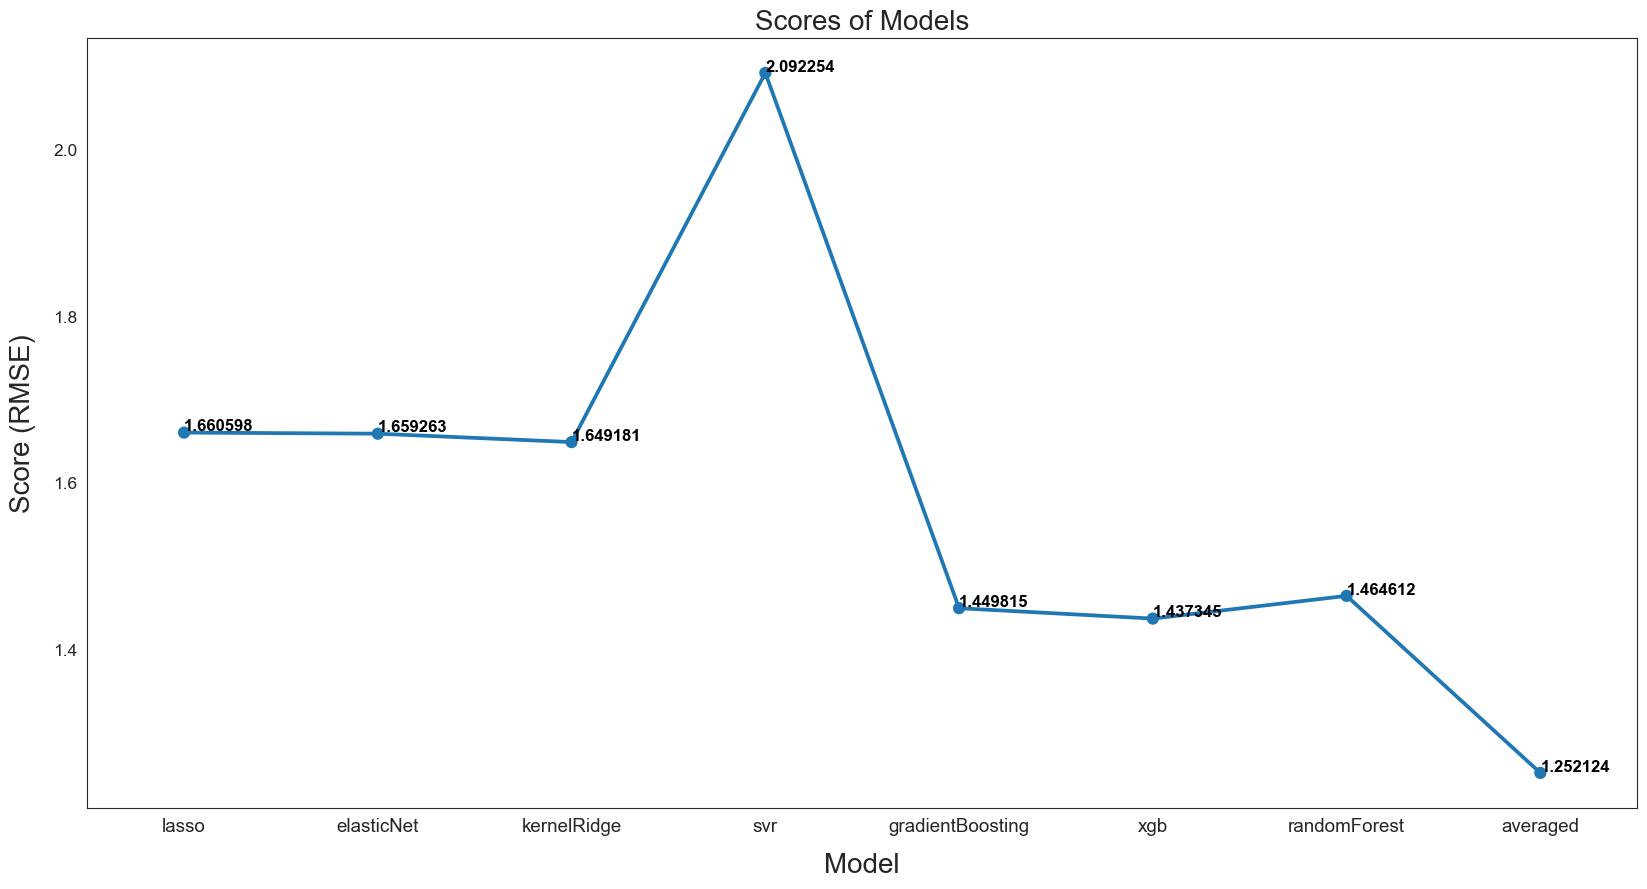

In [32]:
sns.set_style("white")
fig = plt.figure(figsize=(20, 10))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)
plt.title('Scores of Models', size=20)
plt.show()

In [23]:
test_predict = np.exp(ensemble_models(X_test))
print(test_predict[::5])

[ 3.3085294   4.32652774  5.15678417  3.25533331 14.93383213  3.53150662
  2.79125888  4.34696354  4.49866405  3.71448619 30.8693593   5.725728
 11.9550065  11.03267512  2.94741006  3.9252223   7.60129911 18.60539213
  3.15999269  5.671973    9.41646032  3.75164942  4.93542578  2.32229956
  2.70077809  2.95710072  3.13580554  3.59182696 33.18791319  6.88369822
 11.54793697  3.64453021  2.32254698  6.44364475 18.98847731  2.20947259
  3.0954211  17.03871756 12.51953157  3.57468475  5.07111227  2.84310797
  2.82520437  4.64743142 34.89819521 12.62260434  3.92234374 22.75211522
  9.23186302  2.85515516 10.10904048  6.26410835 24.27803334  5.18151926
 14.88251687  2.47120143  2.27132001  4.33359838  4.79405718 18.8701923
  3.94736685  4.27135521  7.71900859  2.29461693  3.3545775   4.25895962
  6.32398177  2.54949848  6.07751878  4.67183153  6.55178675  3.25924232
  2.37073164 25.77017272  4.55434563  2.96845942  2.72161819  2.81087294
  6.72704016 11.58850776  7.95693567 10.07264002  3.94